# What do we mean by Image Resolution and how many types of them are there?

This notebook gives an overview of what is the meaning of image resolution of spatial, spectral and temporal kind

In [2]:
# Importing libraries
import cv2
import sys
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
np.set_printoptions(threshold=sys.maxsize, linewidth = 120)

In [3]:
# Reading a sample image
img = cv2.imread('C://Users//ankushukla//Documents//Work//CV Training//cat.jpg')
image = img.copy()

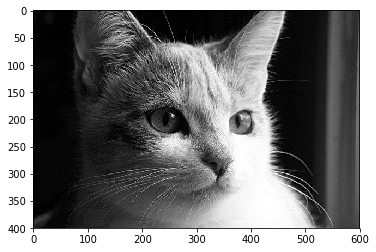

In [4]:
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [5]:
def spatial_binning(img, fac = 2):
    im = img
    if(len(img.shape) == 2):
        for i in range(0, img.shape[0], fac):
            for j in range(0, img.shape[1], fac):
                im[i:i+fac, j:j+fac] = np.average(img[i:i+fac, j:j+fac])
        im[:,:] = 255*im[:,:]/np.max(im[:,:])
    else:
        for i in range(0, img.shape[0], fac):
            for j in range(0, img.shape[1], fac):
                im[i:i+fac, j:j+fac, 0] = np.average(img[i:i+fac, j:j+fac, 0])
                im[i:i+fac, j:j+fac, 1] = np.average(img[i:i+fac, j:j+fac, 1])
                im[i:i+fac, j:j+fac, 2] = np.average(img[i:i+fac, j:j+fac, 2])
        im[:,:,0] = 255*im[:,:,0]/np.max(im[:,:,0])
        im[:,:,1] = 255*im[:,:,1]/np.max(im[:,:,1])
        im[:,:,2] = 255*im[:,:,2]/np.max(im[:,:,2])
    return im

(400, 600, 3)
(400, 600, 3)


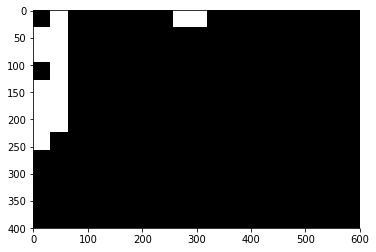

In [7]:
i = spatial_binning(image[:,:,0], fac = 32)
j = spatial_binning(image[:,:,1], fac = 32)
k = spatial_binning(image[:,:,2], fac = 32)
im = img
print(im.shape)
temp = im[:,:,0]
im[:,:,0] = i
assert np.all(im[:,:,0] == temp)
im[:,:,1] = j
im[:,:,2] = k
print(im.shape)
# plt.imshow(spatial_binning(img.copy()))
plt.imshow(im)